In [1]:
# basic plotting imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
# define gaussian function
def func_gauss(time_series, amplitude, center, std):
    return amplitude * np.exp(-(((time_series - center)**2) / (2 * (std**2))))

# exponential decay function
def func_exp(time_series, amplitude, tau, offset):
    return amplitude * np.exp(-time_series / tau) + offset


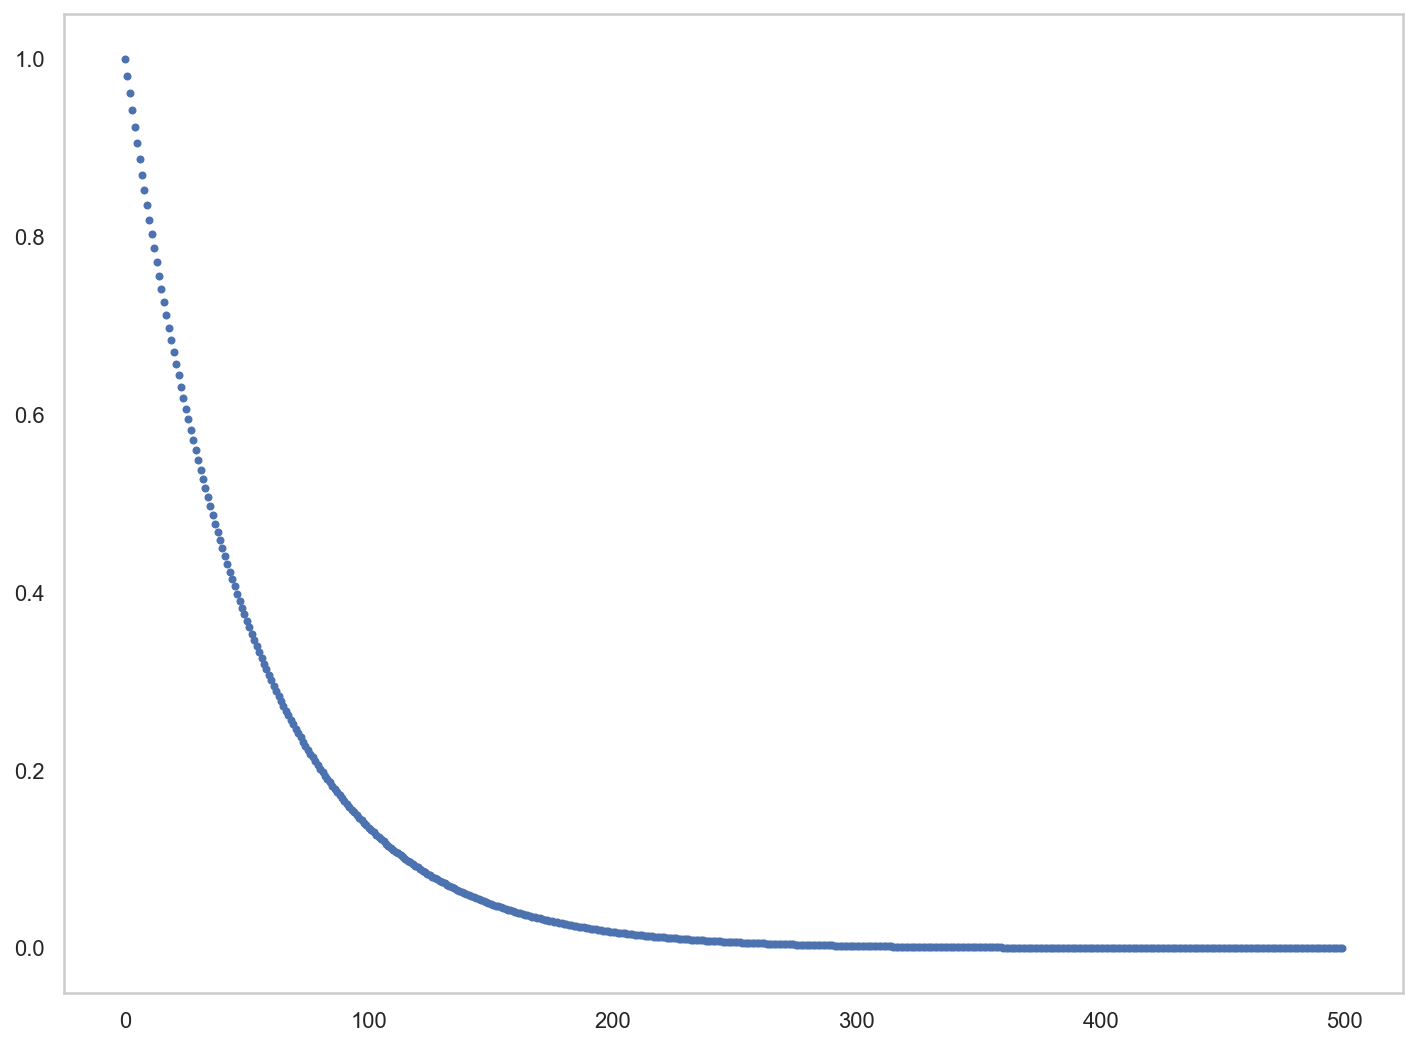

In [7]:
fs = 1000 # sampling rate
kernel_t = 0.5 # number of seconds to simulate
kernel_total_time = int(np.floor(fs * kernel_t))

# create a time-series to pass into the function
kernel_exp = np.arange(0, kernel_total_time)
kernel_exp = func_exp(kernel_exp, 1, 50, 0)

kernel_gauss = np.arange(0, kernel_total_time)
kernel_gauss = func_gauss(kernel_gauss, 1, 250, 50)

plt.plot(kernel_exp, '.')
plt.show()

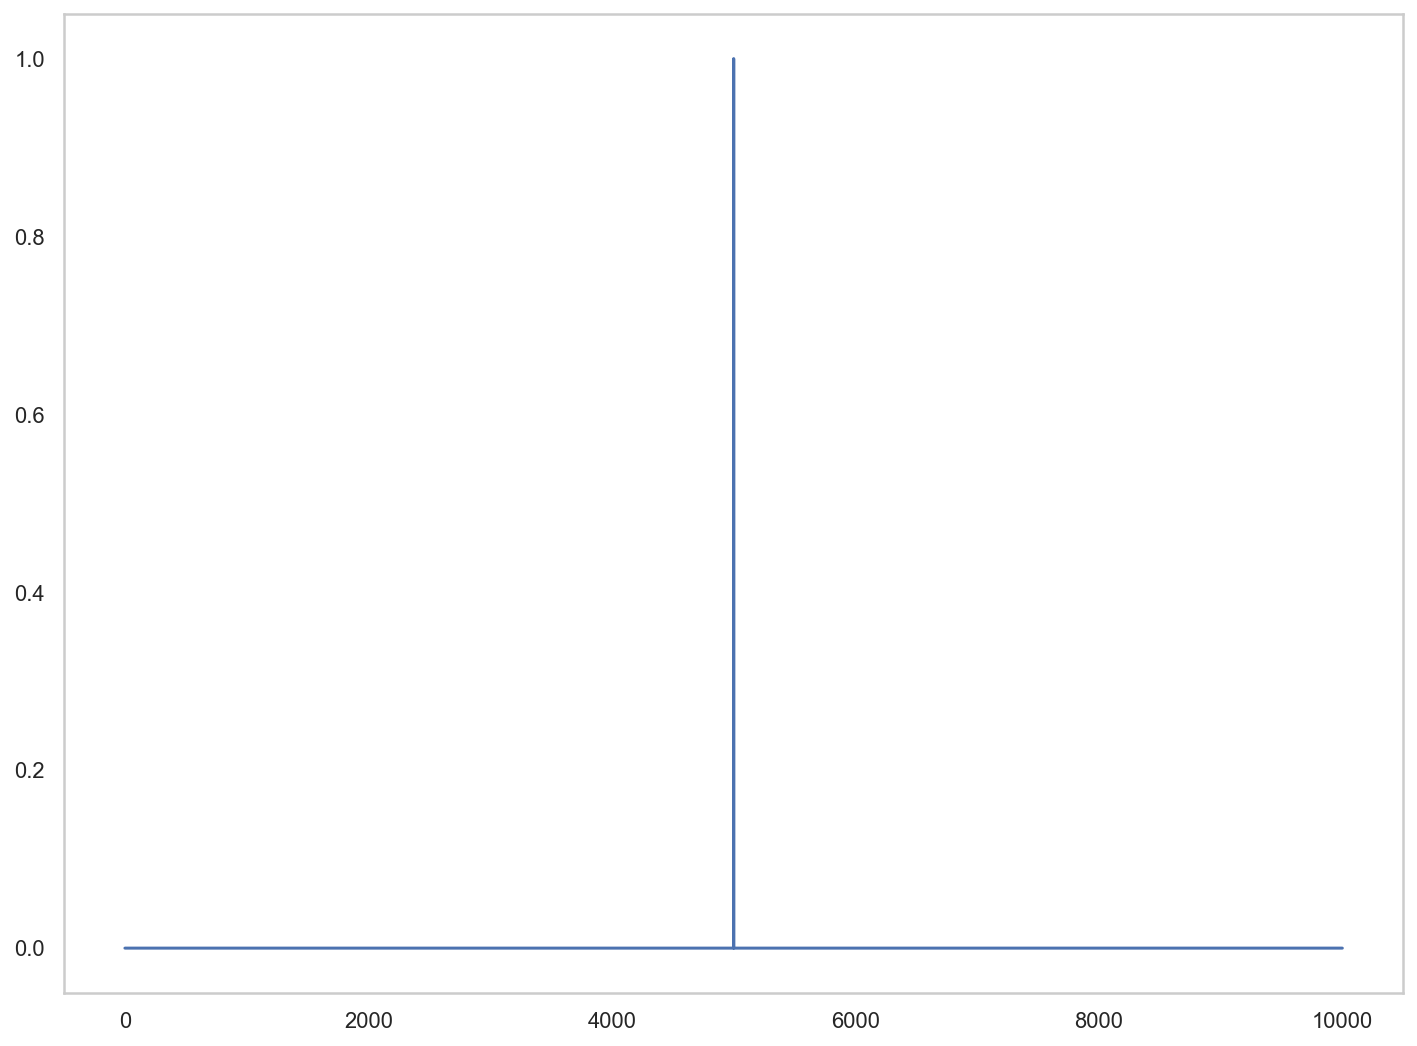

In [8]:
# define Kronecker delta function

fs = 1000 # sampling rate
data_t = 10 # number of seconds to simulate
data_total_time = int(np.floor(fs * data_t))

# "time-series" (vector zero to 10000)
time_series = np.arange(0, data_total_time)

# time series of Kronecker delta function
k_delta_func = np.zeros(data_total_time)
k_delta_func[int(data_total_time/2)] = 1

plt.plot(k_delta_func)
plt.show()

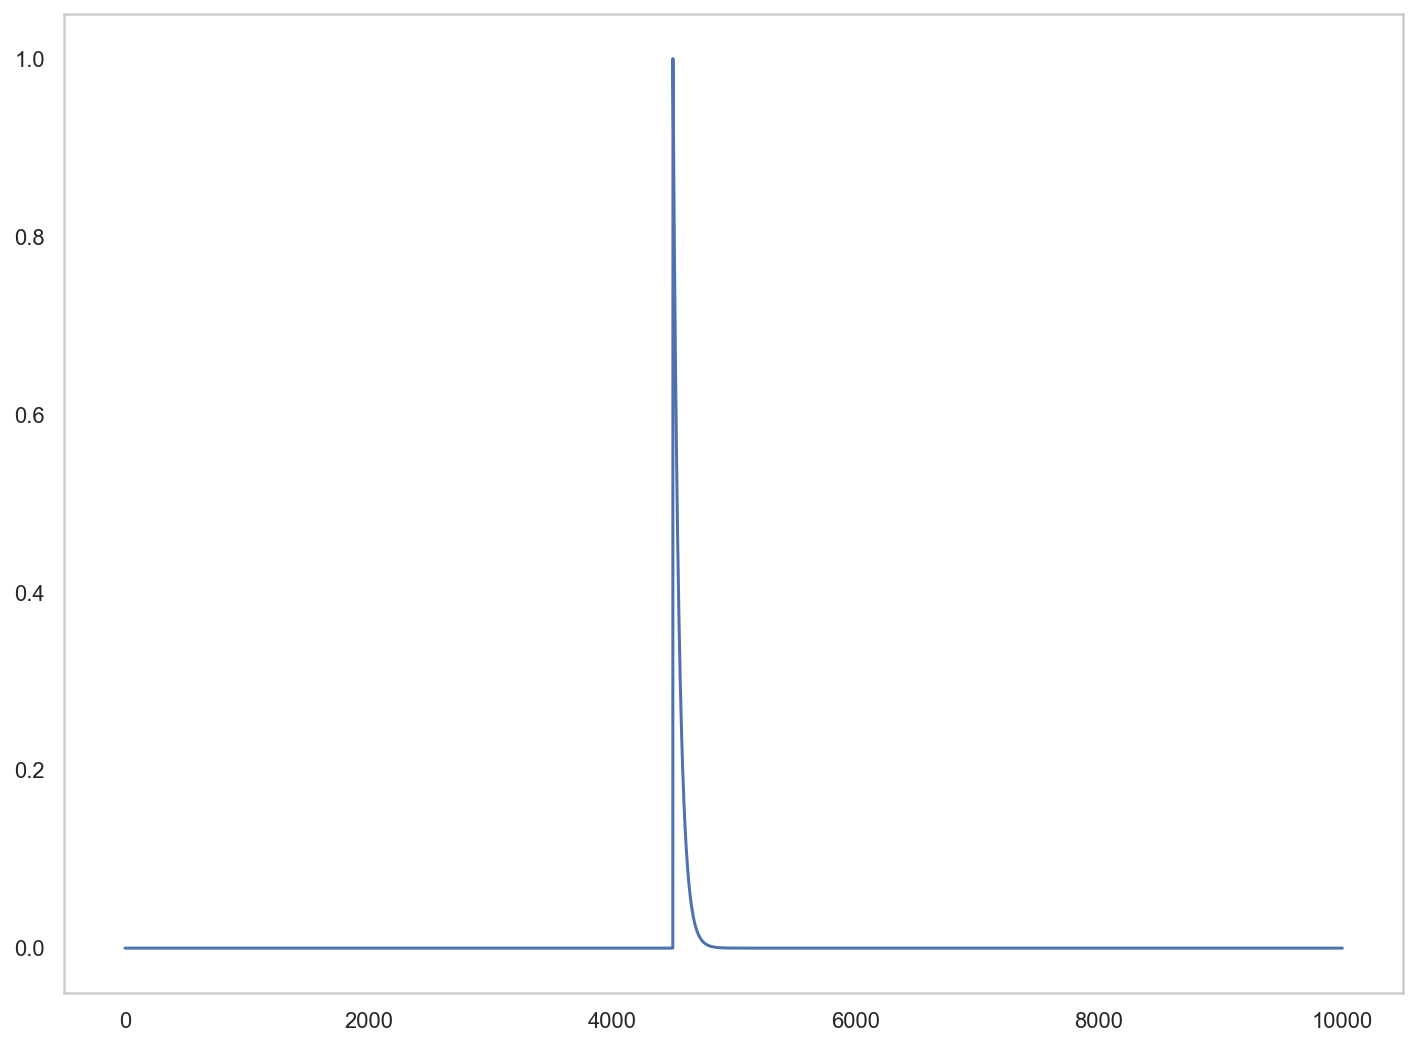

In [9]:
# dot product by hand
def dot_product(x, y):
    if len(x) != len(y):
        raise ValueError('Vectors must be the same length!')

    return sum([x[i] * y[i] for i in range(len(x))])

# convolution by hand
def convolve(signal, kernel):
    # flip the kernel
    kernel = kernel[::-1]

    # initialize the output
    output = np.zeros(len(signal))

    # perform the convolution
    for i in range(len(signal)-len(kernel)+1):
        output[i] = dot_product(signal[i:i + len(kernel)], kernel)

    return output

plt.plot(convolve(k_delta_func, kernel_exp))
plt.show()

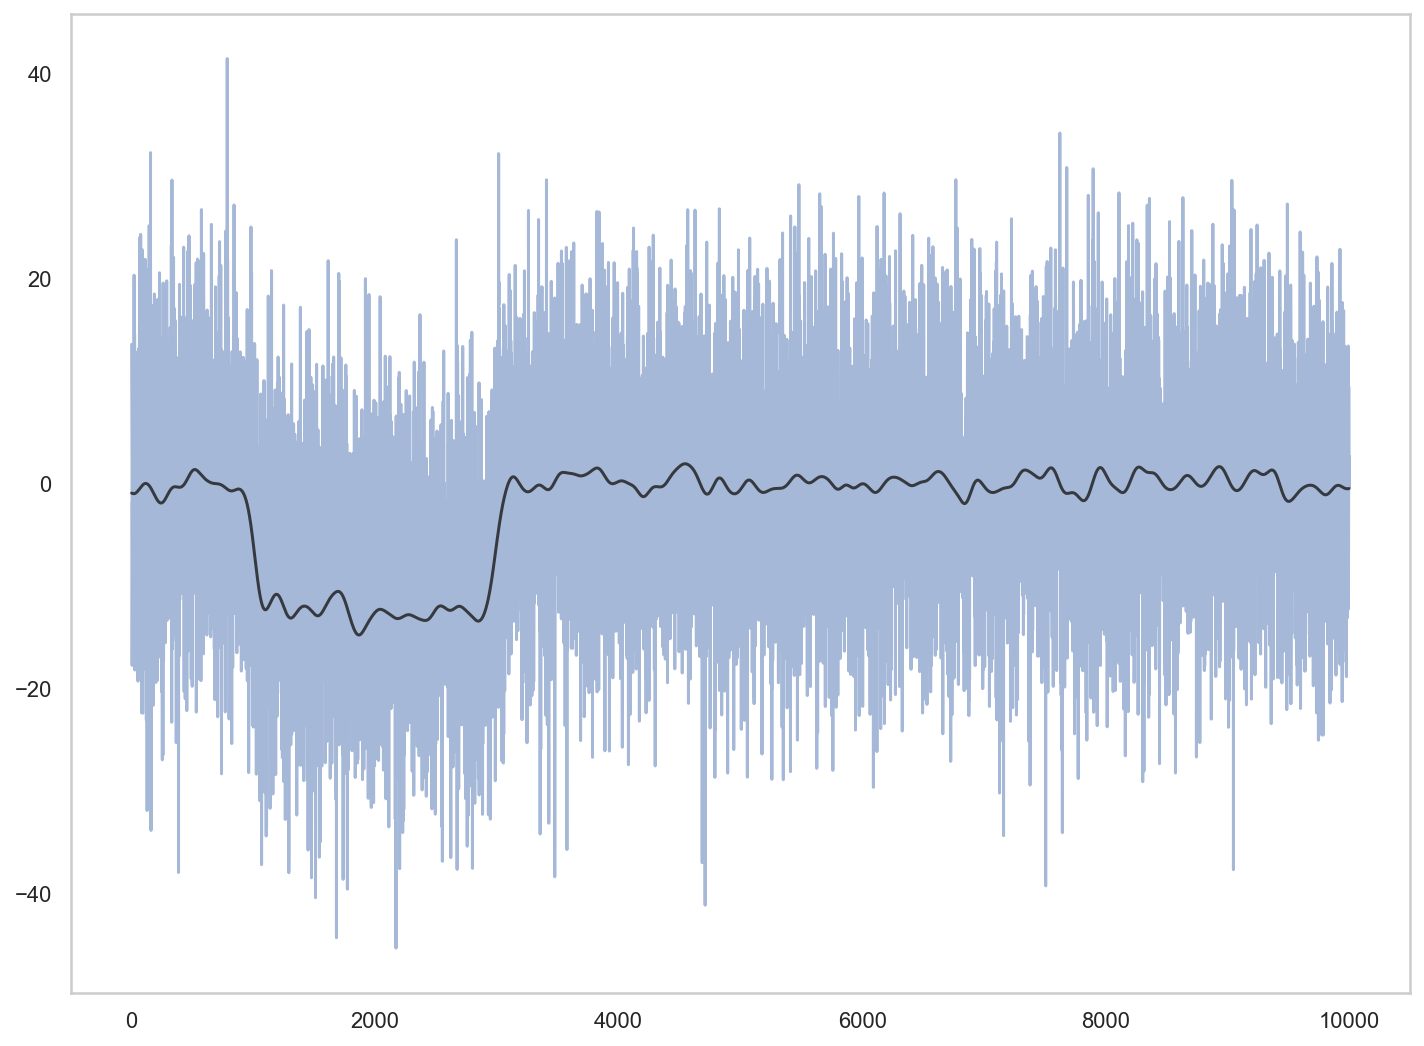

In [12]:
def white_noise_signal(length, amplitude):
    return np.random.normal(0, amplitude, length)

noisy_data = white_noise_signal(data_total_time, 10)
noisy_data[1000:3000] = noisy_data[1000:3000]-10
plt.plot(noisy_data, 'b', alpha = 0.5)
plt.plot(np.convolve(noisy_data, kernel_gauss, mode='same')/100, 'k', alpha = 0.8)
plt.show()